<a href="https://colab.research.google.com/github/lailasaffa/Tutorial-PDB/blob/main/Tutorial_Data_Pre_Processing_dan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Data Pre-Processing and Clustering
Laila Saffanah - 1706043531


In [ ]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
flight = pd.read_csv("Penerbangan.csv")
flight.head() #menampilkan isi dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied


#1. Pembersihan Data

In [ ]:
flight.isna().sum() #menampilkan jumlah data yang hilang

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
flight_fill = flight.fillna(method='ffill') #menghapus data yang bernilai nul
flight_fill.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
flight_ori = flight_fill.copy()

In [ ]:
from sklearn import preprocessing #library untuk pra pemrosesan data kategorik ke numerik

le = preprocessing.LabelEncoder()

for column in ['Gender','Customer Type','Class','Type of Travel','satisfaction','Arrival Delay in Minutes']:
    le.fit(flight_fill[column])
    flight_fill[column] = le.transform(flight_fill[column]) #transformasi data dengan kolom yang didefinisikan ke numerik

In [ ]:
flight_fill.dtypes

Unnamed: 0                           int64
id                                   int64
Gender                               int64
Customer Type                        int64
Age                                  int64
Type of Travel                       int64
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Del

# 2. Analisis Korelasi

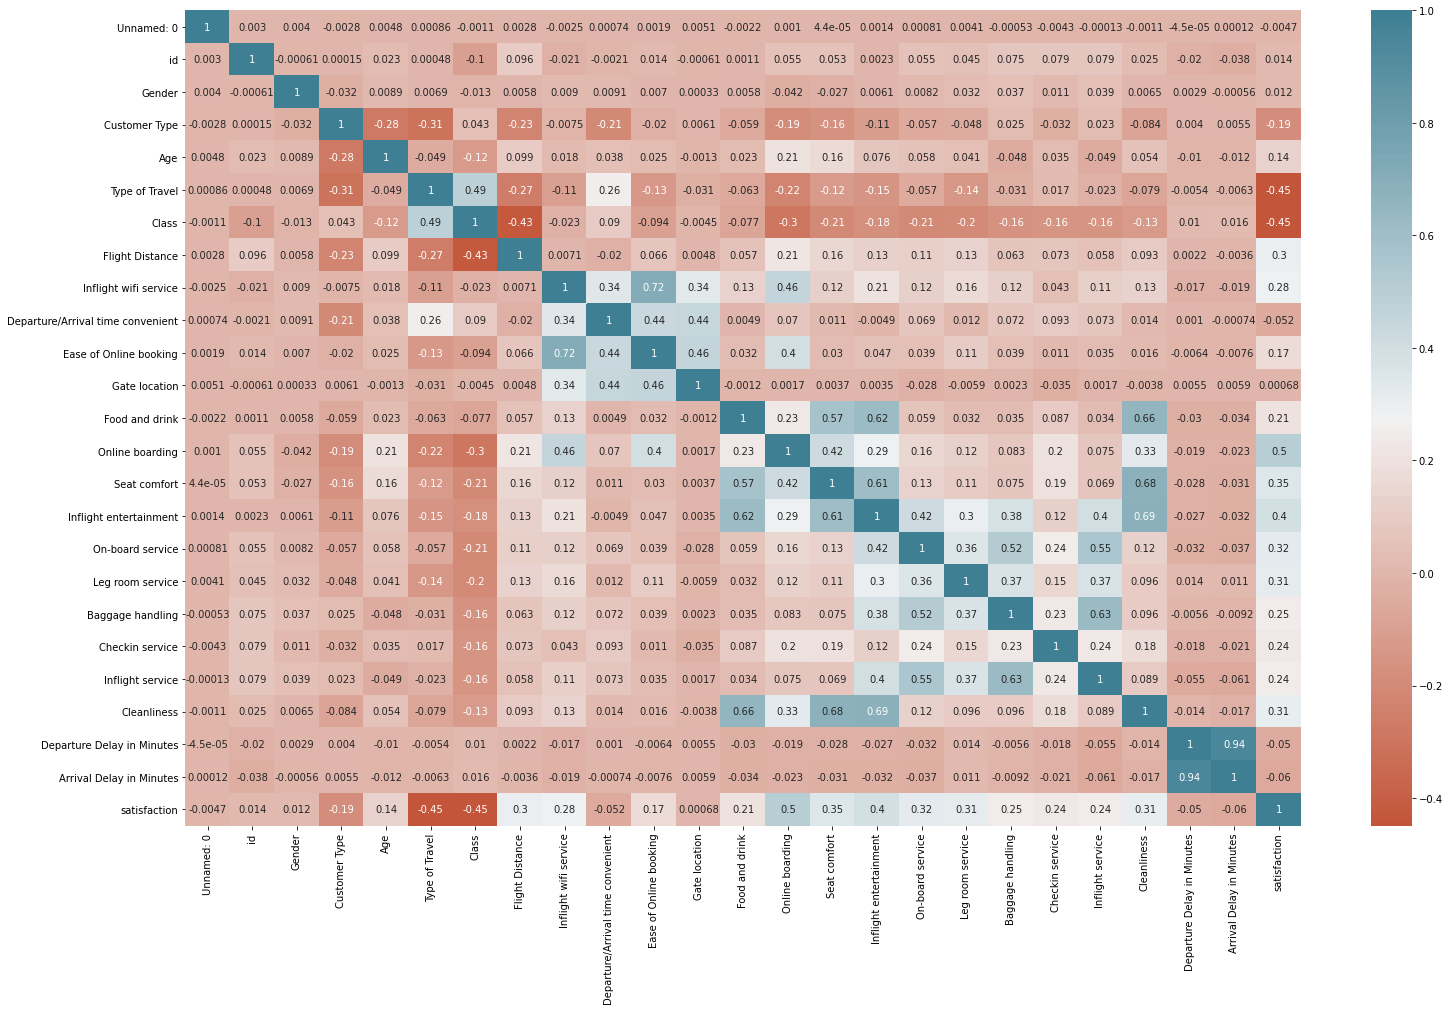

In [ ]:
plt.figure(figsize=(25,15))
cor = flight_fill.corr()
sns.heatmap(cor,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [ ]:
cor_target = abs(cor["Cleanliness"]) #memilih fitur yang memiliki nilai korelasi tinggi
relevant_features = cor_target[cor_target>0.5]
relevant_features

Food and drink            0.657760
Seat comfort              0.678534
Inflight entertainment    0.691815
Cleanliness               1.000000
Name: Cleanliness, dtype: float64

In [ ]:
print(flight_fill[["Food and drink","Seat comfort","Inflight entertainment"]].
corr(method="pearson"))

                        Food and drink  Seat comfort  Inflight entertainment
Food and drink                1.000000      0.574556                0.622512
Seat comfort                  0.574556      1.000000                0.610590
Inflight entertainment        0.622512      0.610590                1.000000


Fitur-fitur yang terpilih antara lain Food and drink, Seat comfort,dan Inflight entertainment. Untuk data ini akan lebih cocok jika diselesaikan dengan menggunakan analisis regresi dengan target fiturnya adalah Cleanliness

# Pembagian dataset menjadi data latih dan data uji

Pada tutorial ini, dataset dibagi menjadi training dan testing dengan metode hold-out dengan proporsi data latih:uji sebesar 90:10

In [ ]:
#dalam hal ini, kita hanya akan mengambil data penjualan sebagai masukan untuk melakukan pra pemrosesan pemisahan data
#sebagai data latih dan data uji
data_flight = flight_ori[['Food and drink','Seat comfort','Inflight entertainment','Cleanliness']].to_numpy()

In [ ]:
label_flight = flight_ori['satisfaction'].to_numpy() # sebagai target untuk data latih

Setelah menentukan data yang akan diproses menjadi data latih, selanjutnya kita bagi datanya menjadi berapa persen kebutuhan data latih yang kita inginkan dan berapa persen data uji yang kita inginkan untuk kebutuhan model kita nantinya.

In [ ]:
from sklearn.model_selection import train_test_split #library untuk memisahkan data menjadi data latih dan data uji
train_x, test_x, train_y, test_y = train_test_split (data_flight,label_flight,test_size=0.10) 
#test_size 0.10 artinya data dipisah 90% sebagai data latih 10% untuk data uji

In [ ]:
from sklearn import svm #library svm

clf = svm.SVC(gamma='scale')
clf.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Selanjutnya kita prediksi model kita terhadap target tujuan yaitu satisfaction

In [ ]:
pred_y = clf.predict(test_x)
print(pred_y)

['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' ... 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied']


Untuk memastikan tingkat keberhasilan dari klasifikasi yang kita lakukan, kita lakukan uji akurasi dari model yang kita dapatkan.

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,pred_y)
print(score)

0.7430468674814743


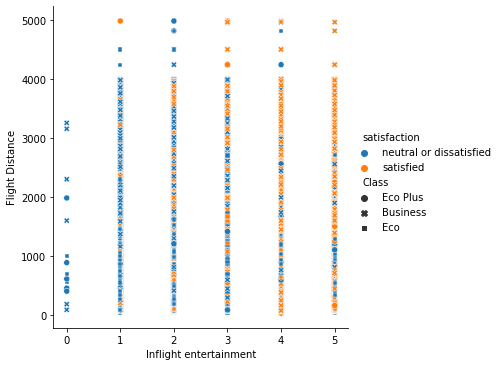

In [ ]:
#visualisasi penjualan video game berdasarkan tahun pada negara North America untuk setiap genre permainan
sns.relplot(x='Inflight entertainment', y='Flight Distance', hue='satisfaction',style="Class", data=flight,sizes=(10, 100));

# Pra Proses Penskalaan Fitur/Reduksi Dimensi


Dalam tutorial ini kita coba normalisasi menggunakan standard_scaler dengan mengikuti pola distribusi normal, membuat mean menjadi 0 dan menskalakan data ke unit varians.

In [ ]:
standard_scale = preprocessing.StandardScaler()
data_standard = standard_scale.fit_transform(flight_fill) #disini kita gunakan dataset yang sudah di transform ke numerik
flight_standard = pd.DataFrame(data_standard, columns=flight_fill.columns)

Setelah dinormalisasi kita reduksi dimensinya menggunakan PCA menjadi 2 dimensi

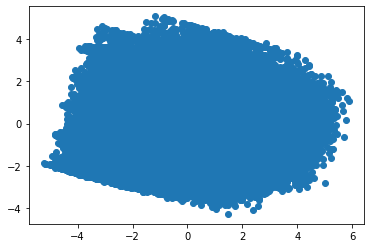

In [ ]:
from sklearn.decomposition import PCA #library untuk reduksi dimensi

pca = PCA(n_components=2)
pca_flight = pca.fit_transform(flight_standard)
plt.scatter(pca_flight[:,0], pca_flight[:,1])

#Clustering

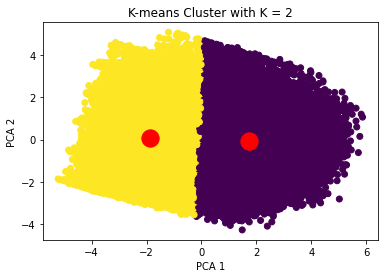

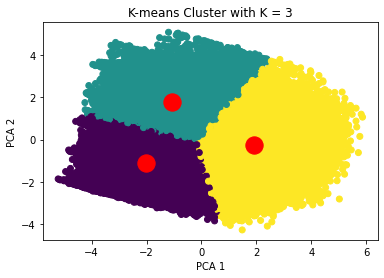

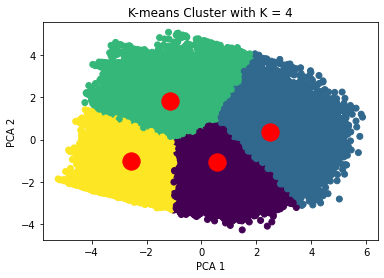

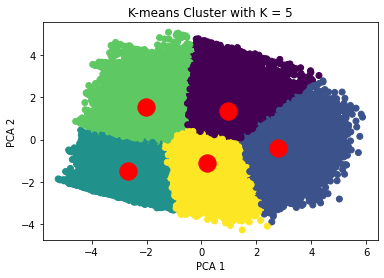

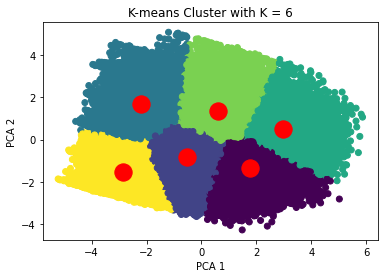

In [ ]:
from sklearn.cluster import KMeans

for num_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(pca_flight)
    plt.scatter(pca_flight[:, 0], pca_flight[:,1], c=clusters)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
    plt.title('K-means Cluster with K = {}'.format(num_clusters))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

Setelah kita mendapatkan prediksi model hasil clustering, selanjutnya kita harus melihat tingkat keberhasilan clustering yang kita lakukan dengan menggunakan metrik uji terhadap metode clustering, salah satu contohnya adalah uji silhouette score yang paling cocok terhadap metode K-Means.

In [ ]:
from sklearn.metrics import silhouette_score #library uji kecocokan hasil kluster

Text(0, 0.5, 'Silhouette Coefficient')

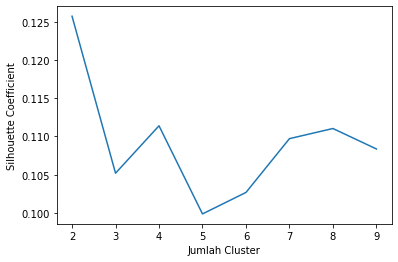

In [ ]:
k_range = range(2,10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(flight_standard)
    scores.append(silhouette_score(flight_standard, km.labels_))

plt.plot(k_range,scores)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Coefficient')

In [ ]:
print(scores)

[0.12573120406134267, 0.10519824958553328, 0.11139897749029255, 0.09987074379093383, 0.1026799886059451]


Dari hasil visualisasi output, dapat dilihat bahwa jumlah klaster optimum yang
diperoleh adalah 2 klaster dengan nilai silhouette 0.125.
